In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier, plot_tree

In [22]:
employee_satisfaction_data = pd.read_csv('data.csv')

In [23]:
from sklearn.preprocessing import LabelEncoder

employee_satisfaction_data['recruitment_type'].fillna('S', inplace=True)
employee_satisfaction_data['recruitment_type'] = LabelEncoder().fit_transform(employee_satisfaction_data['recruitment_type'])
employee_satisfaction_data

,Unnamed: 0,emp_id,age,Dept,location,education,recruitment_type,job_level,rating,onsite,awards,certifications,salary,satisfied
0,0,HR8270,28,HR,Suburb,PG,2,5,2,0,1,0,86750,1
1,1,TECH1860,50,Technology,Suburb,PG,3,3,5,1,2,1,42419,0
2,2,TECH6390,43,Technology,Suburb,UG,2,4,1,0,2,0,65715,0
3,3,SAL6191,44,Sales,City,PG,0,2,3,1,0,0,29805,1
4,4,HR6734,33,HR,City,UG,1,2,1,0,5,0,29805,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,495,HR5330,49,HR,Suburb,PG,0,2,5,0,6,0,29805,1
496,496,TECH9010,24,Technology,Suburb,UG,2,2,4,0,2,0,29805,0
497,497,MKT7801,34,Marketing,City,PG,0,1,3,0,2,0,24076,1
498,498,TECH5846,26,Technology,City,UG,0,2,1,1,1,1,29805,0


In [38]:
x = employee_satisfaction_data.drop(['emp_id', 'location', 'education', 'onsite', 'job_level', 'rating', 'awards', 'certifications', 'Unnamed: 0', 'satisfied', 'Dept'], axis = 1)

,age,recruitment_type,salary
0,28,2,86750
1,50,3,42419
2,43,2,65715
3,44,0,29805
4,33,1,29805
...,...,...,...
495,49,0,29805
496,24,2,29805
497,34,0,24076
498,26,0,29805


In [25]:
y = employee_satisfaction_data['Dept']

In [26]:
set(y)

{'HR', 'Marketing', 'Purchasing', 'Sales', 'Technology'}

In [27]:
print(type(x), type(y))
print(x.shape, y.shape)

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.series.Series'>
(500, 3) (500,)


In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20)

In [29]:
print(type(x), type(y))
print(X_train.shape, y_train.shape)

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.series.Series'>
(400, 3) (400,)


In [31]:
model = DecisionTreeClassifier(criterion='gini')

In [33]:
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [34]:
y_pred = model.predict(X_test)

In [35]:
from sklearn.metrics import classification_report, confusion_matrix

In [36]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          HR       0.26      0.29      0.27        24
   Marketing       0.25      0.32      0.28        19
  Purchasing       0.17      0.14      0.15        21
       Sales       0.25      0.19      0.21        16
  Technology       0.26      0.25      0.26        20

    accuracy                           0.24       100
   macro avg       0.24      0.24      0.24       100
weighted avg       0.24      0.24      0.24       100



In [37]:
print(confusion_matrix(y_test, y_pred))

[[7 4 2 7 4]
 [6 6 4 0 3]
 [5 6 3 2 5]
 [5 3 3 3 2]
 [4 5 6 0 5]]


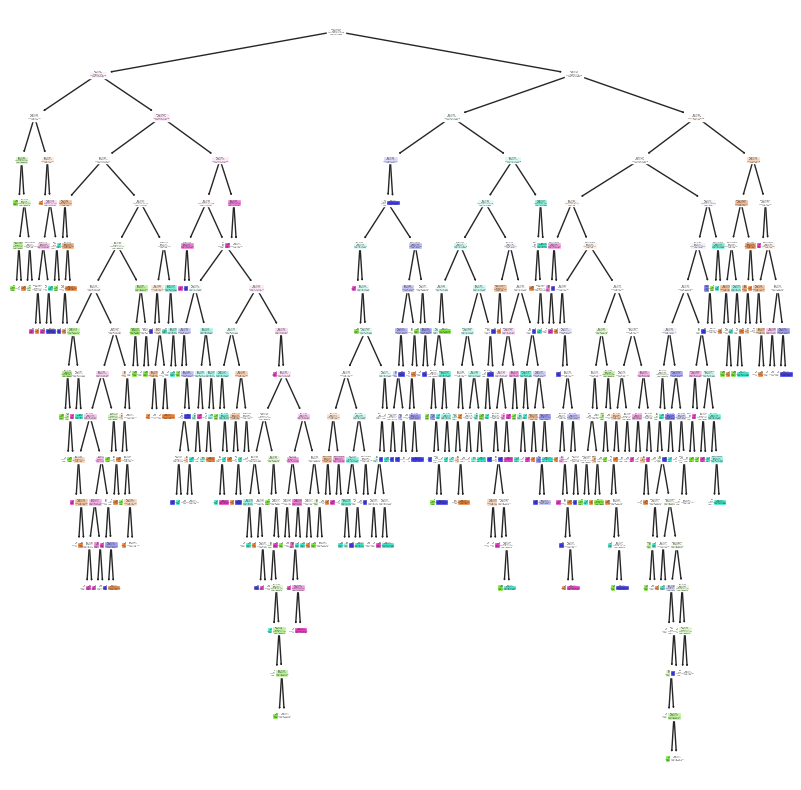

In [39]:
plt.figure(figsize = (10, 10))
plot_tree(model, feature_names = ['age', 'salary', 'Dept'],
          class_names = ['HR', 'Marketing', 'Purchasing', 'Sales', 'Technology'], filled = True)
plt.show()